# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

---

# Analyzing the Members of Starbucks Rewards Program

## 1. Project Definition

### 1.1. Project Overview

Coffee is one of the most popular drinks in the world. Drinking a cup of coffee is the first thing millions of people start their day with because it provides the body with an energy boost. According to a recent research on coffee, around 2.25 billion cups of coffee are consumed around the world annually. In the United States, there are more than 21,400 coffee shops. Starbucks coffee shop is one of the most famous coffee shops in the world which has 24,000 stores.

Starbucks always focus on satisfying their customers and make them feel happy. Starbucks does this by knowing their names and their previous orders. Additionally, Starbucks is always creating new ideas to get the customer feedback. Starbucks seeks to satisfy their loyal customers by ‘Starbucks Rewards’ program. Starbucks rewards program is a loyalty programs which offers freebies and discounts to the members. The customers can join the rewards program using Starbucks rewards mobile app. The mobile app provides the customers with offers and allows the customer to collect stars and earn rewards. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free).

To satisfy the customers and keep the business running, the customers interaction with the offers should be investigated. In this project, I will investigate the Starbucks customers interaction with the offers by analyzing a simulated data that mimics customer behavior on the Starbucks Rewards mobile app. 


### 1.2. Problem Statement

One of the Starbucks goals is to attract their customers through offers that sent from the Starbucks Reward mobile app. To achieve this goal, the customer behaviors should be investigated in order to improve the Starbucks business. Thus, I will analyze data of the mobile app to answer the following main questions:

1.	Will the customer respond to the offer?
2.	Which offer should be sent to the customer?
3.	Which customers view offers?
4.	Which customers paid more money? 

To answer the four questions, different techniques of machine learning and statistics will be used. 


### 1.3. Metrics

In the project, I will build classification models that can be evaluated by the accuracy metric. Accuracy measures how often the classifier makes the correct prediction and it is the ratio between the number of correct predictions and the total number of the data point.

The project is organized as follows. Section 2 explores and visualize the data. Section 3 includes all steps of data pre-processing and implement the solution. Finally, Section 4 presents the conclusion.

In [112]:
# Import needed libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV  
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from time import time
import seaborn as sns

# Disply all columns in dataframe
pd.options.display.width = 0

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## 2. Analysis

This section viewed the data exploration and visualization to discover the first insights into the data and to detect interesting subsets.

### 2.1. Data Exploration and Visualization

Here the three datasets are explored by checking the columns and data types using different functions: `head()`, `shape`, `info()`, `describe()`. The null values also is checked using `is_null`. Moreover, visualization methods are used to answer some exploration questions. 

In [113]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [114]:
portfolio.shape

(10, 6)

In [115]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [116]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [117]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [118]:
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

**Observations:**

It is clear that the portfolio dataset has only few rows (10 rows) and zero null values. We can see that the channel column contains a list and the offer_type column is a categorical variable. So, the channels will be splitted into different columns and the offer_type column will be encoded to dummy variables in the preprocessing step. 

**Exploratory Questions**

* **What is the reward amount of the different offers types?**

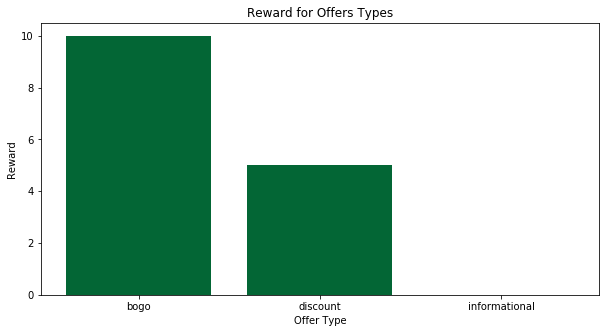

In [119]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.bar(portfolio['offer_type'], portfolio['reward'], color = '#036635')
plt.xlabel('Offer Type')
plt.ylabel('Reward')
plt.title('Reward for Offers Types')
plt.show()

* **What is the duration of the different offers types?**

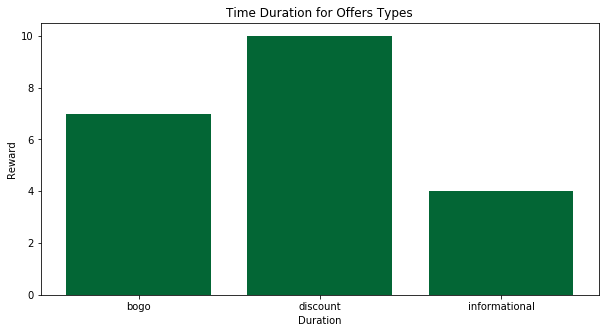

In [120]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.bar(portfolio['offer_type'], portfolio['duration'], color = '#036635')
plt.xlabel('Duration')
plt.ylabel('Reward')
plt.title('Time Duration for Offers Types')
plt.show()

The maximum duration of the discount offer is 10 days which is the highest duration. 

* **What is the relationship between the difficulty and reward?**

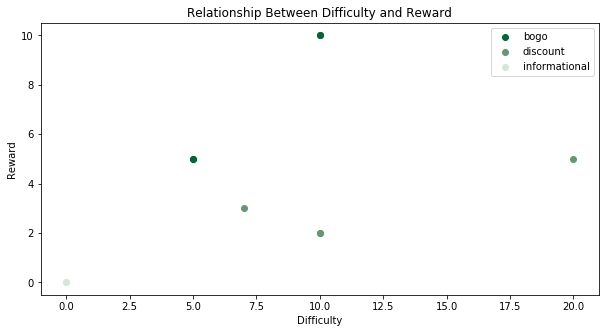

In [121]:
# Create a plot
offers = portfolio.groupby('offer_type')
figure, ax = plt.subplots(figsize = (10, 5))
color = ['#036635', '#649873', '#d7e5da']
i = 0 
for name, group in offers:
    ax.plot(group.difficulty, group.reward, marker = 'o', linestyle = '', label = name, c = color[i])
    i += 1
ax.legend()
plt.xlabel('Difficulty')
plt.ylabel('Reward')
plt.title('Relationship Between Difficulty and Reward')
plt.show()

In BOGO offer, there is a direct proportion between the difficulty and reward.

#### 2.1.2. Profile Dataset

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [122]:
profile.head(20)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [123]:
profile.shape

(17000, 5)

In [124]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [125]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [126]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [127]:
profile.duplicated().sum()

0

**Observations:**

As it is clear from the profile dataset, the type of *become member on* column is int not date so, the column type should be converted to date type. The gender column also is a categorical variable and it should be encoded as dummy variables. I will apply these changes in the preprocessing step. The age column includes 118 years old so, I have to explore it. The gender and income columns have 2175 null values so, it will be investigated. 

**Exploratory Questions**

* **What is the age range of the customers?**

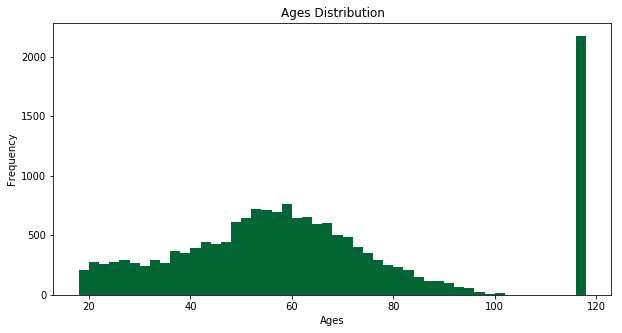

In [128]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(profile['age'], bins = 50, color = '#036635')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Ages Distribution')
plt.show()

The range of the customers' ages are between 18 and 100 years old and highest number of customers are between 50 and 70 years old. 

* **What is the number of customers by gender?**

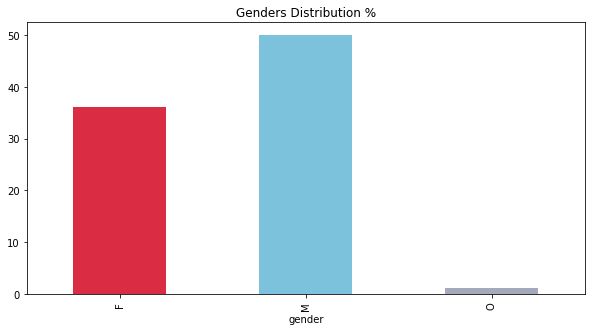

In [129]:
customer_gender = profile.groupby(['gender']).count()['id']/profile.shape[0] * 100
figure, ax = plt.subplots(figsize = (10, 5))
customer_gender.plot(kind='bar', title ='Genders Distribution %', color = ['#da2c43', '#7dc2dd', '#a4aabc'], ax = ax);

In [130]:
# Check the null values of gender
profile[(profile['gender'].isnull())].count()

age                 2175
became_member_on    2175
gender                 0
id                  2175
income                 0
dtype: int64

In [131]:
profile[(profile['gender'].isnull())]['age'].value_counts()

118    2175
Name: age, dtype: int64

The number of male customers exceed the number of female customers. 50% of the customers are male and around 35% of them are female. 
When I checked the null values of gender column, I found that all people who do not have gender value, they are 118 years old. 

* **What is the incomes range of the customers?**

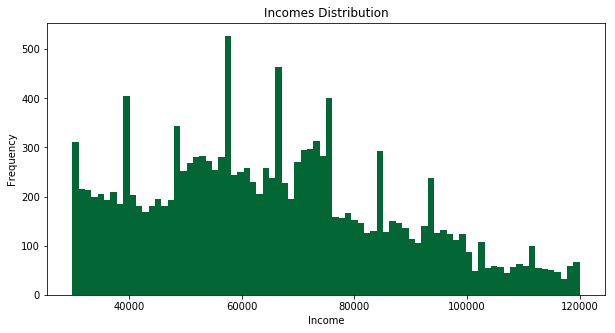

In [132]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(profile['income'].dropna(), bins = 80, color = '#036635')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Incomes Distribution')
plt.show()

The range of the customers' incomes is \\$30000 - \\$120000.

#### 2.1.3. Transcript Dataset

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [133]:
transcript.head(20)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [134]:
transcript.shape

(306534, 4)

In [135]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [136]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [137]:
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

**Observations**:

As we can see, there are no null values in the transcript dataset. The event column is a categorical variable. So, it should be encoded as dummy variables. The value column contains dictionaries and its values should be extracted. We can also see that the time column is time in hours and the duration in the portfolio dataset is duration in days and for simplicity the time and duration column should use the same unit, so I will change the time to days. All these changes will be applied in the preprocessing steps.

**Exploratory Questions**

* **What is the percentage of the different events?**

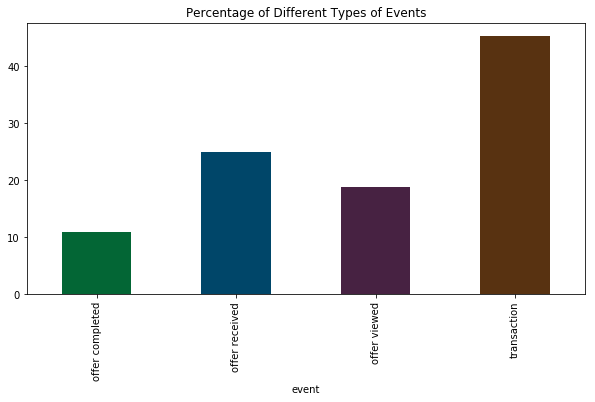

In [138]:
transcript_event = transcript.groupby(['event']).count()['value']/transcript.shape[0] * 100
figure, ax = plt.subplots(figsize = (10, 5))
transcript_event.plot(kind ='bar', title ='Percentage of Different Types of Events', 
                      color = ['#036635', '#004669', '#472242', '#583211'], ax = ax);

We can see that transaction events represent around 50% of all events and completed events represents only 10% of the events. Moreover, less than half of the received offers are completed. 

* **What is the number of the events by person?**

Here I want to see in general the number of events by person. 

In [139]:
transcript.groupby(['person', 'event']).count()

time  value
person                           event                       
0009655768c64bdeb2e877511632db8f offer completed     3      3
                                 offer received      5      5
                                 offer viewed        4      4
                                 transaction         8      8
00116118485d4dfda04fdbaba9a87b5c offer received      2      2
                                 offer viewed        2      2
                                 transaction         3      3
0011e0d4e6b944f998e987f904e8c1e5 offer completed     3      3
                                 offer received      5      5
                                 offer viewed        5      5
                                 transaction         5      5
0020c2b971eb4e9188eac86d93036a77 offer completed     3      3
                                 offer received      5      5
                                 offer viewed        3      3
                                 transaction         8      8
0020ccbbb6d84e358d3414a3ff76cffd offer completed     3      3
                                 offer received      4      4
                                 offer viewed        4      4
                                 transaction        12     12
003d66b6608740288d6cc97a6903f4f0 offer completed     3      3
                                 offer received      5      5
                                 offer viewed        4      4
                                 transaction        18     18
00426fe3ffde4c6b9cb9ad6d077a13ea offer completed     1      1
                                 offer received      5      5
                                 offer viewed        2      2
                                 transaction        17     17
004b041fbfe44859945daa2c7f79ee64 offer completed     2      2
                                 offer received      3      3
                                 offer viewed        2      2
...                                                ...    ...
ffed75d3abc64b488982f50ed12878b5 offer viewed        2      2
ffede3b700ac41d6a266fa1ba74b4f16 offer received      4      4
                                 offer viewed        3      3
                                 transaction        11     11
fff0f0aac6c547b9b263080f09a5586a offer received      3      3
                                 offer viewed        3      3
                                 transaction         6      6
fff29fb549084123bd046dbc5ceb4faa offer completed     6      6
                                 offer received      6      6
                                 offer viewed        5      5
                                 transaction        11     11
fff3ba4757bd42088c044ca26d73817a offer completed     3      3
                                 offer received      6      6
                                 offer viewed        3      3
                                 transaction        11     11
fff7576017104bcc8677a8d63322b5e1 offer completed     3      3
                                 offer received      5      5
                                 offer viewed        4      4
                                 transaction         6      6
fff8957ea8b240a6b5e634b6ee8eafcf offer received      3      3
                                 offer viewed        2      2
                                 transaction         5      5
fffad4f4828548d1b5583907f2e9906b offer completed     3      3
                                 offer received      4      4
                                 offer viewed        4      4
                                 transaction        12     12
ffff82501cea40309d5fdd7edcca4a07 offer completed     6      6
                                 offer received      6      6
                                 offer viewed        6      6
                                 transaction        15     15

[63180 rows x 2 columns]

In [140]:
# Display events of one person
transcript[transcript['person'] == '78afa995795e4d85b5d9ceeca43f5fef']

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
15561,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
47582,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,{'amount': 19.89}
47583,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
49502,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,{'amount': 17.78}
53176,offer received,78afa995795e4d85b5d9ceeca43f5fef,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
85291,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,216,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
87134,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,{'amount': 19.67}
92104,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,{'amount': 29.72}
141566,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,{'amount': 23.93}


## 3. Methodology

This section contains data preprocessing and models implementation. Data preprocessing covers all activities to construct the final dataset from the three datasets. Models implementation subsection answers the four questions by building models.

### 3.1. Data Preprocessing
Here the data is preprocessed to be suitable for modeling. The preprocessing step includes cleaning the dataset, reformatted the datasets and merge the three datasets.  

#### 3.1.1. Cleaning Datasets

From data exploration and visualization section, we can see there are several categorical (non-numeric) features. The machine learning algorithms use numeric features, which requires that non-numeric features be converted. One-hot encoding scheme is used to convert the non-numeric features to numeric features. `get_dummies()` is used to perform one-hot encoding.

Additionally, we can see that there are some features contain lists and dictionaries, these features should be converted into suitable format. Moreover, there are null values which should be removed using `dropna()`. 


#### 3.1.1.1. Portfolio Dataset

In [141]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [142]:
portfolio['channels']

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

In [143]:
def clean_portfolio(df):
    
    """
    Function: clean the portfolio dataframe, 
    the cleaning process includes splitting  the channels column in four columns with 0s, 1s values, 
    and encoding the offer_type column as dummy variables. 
    Args:
      df(Dataframe): portfolio dataframe
    Return:
      clean_df(Dataframe): the clean portfolio dataframe
    """
        
    # Create a list of the channels
    channels_list = ['email', 'mobile', 'social', 'web']
    # Create channels dataframe
    channels = pd.DataFrame(columns = channels_list)
    
    # Loop through the channels column in the df
    for row in df['channels']:
        # Create a dictionary of channels
        items_dict = {'email': 0, 'mobile': 0, 'social': 0, 'web': 0}
        # Check the types of the channels in each row
        for item in channels_list:
            if item in row:
                items_dict[item] = 1
        # Append the dictionary to the channel dataframe        
        channels = channels.append(items_dict, ignore_index=True)
        
    # Concatenate df and channels dataframes
    clean_df = pd.concat([df, channels], axis=1)
    # Drop channel column
    clean_df.drop(['channels'], axis = 1, inplace = True)
    
    offer_type = clean_df['offer_type']
    # Encode the offer_type column as dummy variables
    clean_df = pd.get_dummies(data = clean_df, columns = ['offer_type'])
    
    # Append offer_type column because I want to use it latter
    clean_df = pd.concat([clean_df, offer_type], axis=1)
    
    return clean_df

In [144]:
new_portfolio = clean_portfolio(portfolio)
new_portfolio.head()

,difficulty,duration,id,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_type
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0,bogo
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0,bogo
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1,informational
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0,bogo
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0,discount


#### 3.1.1.2. Porfile Dataset

In [145]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [146]:
def clean_profile(df):
    
    """
    Function: clean the profile dataframe the cleaning process includes removing rows that contains null values, 
    creating a new column that contains became_member_on values after converting it to datatime type, 
    and encoding the gender column as dummy variables
    Args:
      df(Dataframe): profile dataframe
    Return:
      clean_df(Dataframe): the clean profile dataframe
    """
    # Delete all Nan values 
    clean_df = df.dropna(axis = 0)
    
    # Convert become_member_on to datetime
    clean_df['created_account_date'] = clean_df['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
    # Drop channel column
    clean_df.drop(['became_member_on'], axis = 1, inplace = True)
    
    # Encode the gender column as dummy variables
    clean_df = pd.get_dummies(data = clean_df, columns = ['gender'])
    
    return clean_df

In [147]:
new_profile = clean_profile(profile)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [148]:
new_profile.shape

(14825, 7)

In [149]:
new_profile.head()

,age,id,income,created_account_date,gender_F,gender_M,gender_O
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,1,0,0
5,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26,0,1,0
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09,0,1,0
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11-11,0,1,0


In [150]:
new_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 7 columns):
age                     14825 non-null int64
id                      14825 non-null object
income                  14825 non-null float64
created_account_date    14825 non-null datetime64[ns]
gender_F                14825 non-null uint8
gender_M                14825 non-null uint8
gender_O                14825 non-null uint8
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), uint8(3)
memory usage: 622.5+ KB


In [151]:
new_profile.isnull().sum()

age                     0
id                      0
income                  0
created_account_date    0
gender_F                0
gender_M                0
gender_O                0
dtype: int64

In [152]:
new_profile.duplicated().sum()

0

**Age, Genders and Incomes Distributions After Cleaning Profile Dataset**

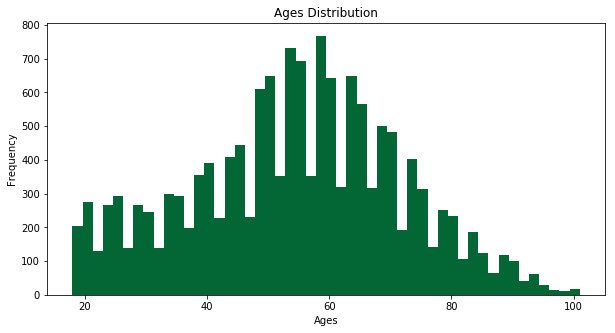

In [153]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(new_profile['age'], bins = 50, color = '#036635')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Ages Distribution')
plt.show()

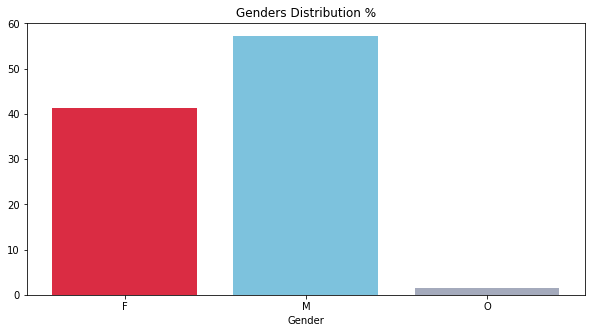

In [154]:
F_gender = new_profile['gender_F'].sum()/new_profile.shape[0] * 100
M_gender = new_profile['gender_M'].sum()/new_profile.shape[0] * 100
O_gender = new_profile['gender_O'].sum()/new_profile.shape[0] * 100

# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = ['F', 'M', 'O'], height = [F_gender, M_gender, O_gender], color = ['#da2c43', '#7dc2dd', '#a4aabc'])
plt.xlabel('Gender')
plt.title('Genders Distribution %')
plt.show()

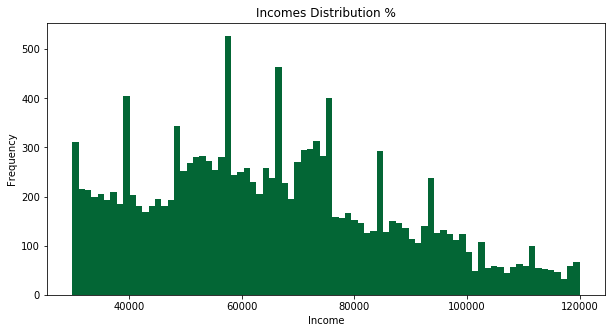

In [155]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(new_profile['income'].dropna(), bins = 80, color = '#036635')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Incomes Distribution %')
plt.show()

I reviewed the distribution of the dataset after cleaning the data. It is clear that the distribution of the ages changed since I removed customers who are 118 years old, but incomes and genders distributions were not changed because the removed customers have null values in income and gender columns.  

#### 3.1.1.3. Transcript Dataset

In [156]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [157]:
def clean_transcript(df):
    
    """
    Function: clean the transcript dataset and it includes adding offer_id and amount columns in transcript dataset. 
    offer_id column contains the id of the offer in case if the event is offer received, offer viewed or offer completed.
    amount coulmn contains the transaction amount if the event is transaction. 
    Cleaning also includes encoding event column to dummy variables and changing time from hours to days. 
    Args:
      df(Dataframe): transcript dataframe
    Return:
      clean_df(Dataframe): the clean transcript dataframe
    """
    
    # Create dfs for each type of the events
    received_offer_transcript = df[df['event'] == 'offer received']
    viewed_offer_transcript = df[df['event'] == 'offer viewed']
    completed_offer_transcript = df[df['event'] == 'offer completed']
    transaction_transcript = df[df['event'] == 'transaction']
    
    # Extract dictionaries values in column
    received_offer_transcript['offer_id'] = received_offer_transcript['value'].apply(lambda x:x["offer id"])
    viewed_offer_transcript['offer_id'] = viewed_offer_transcript['value'].apply(lambda x:x["offer id"])
    completed_offer_transcript['offer_id'] = completed_offer_transcript['value'].apply(lambda x:x["offer_id"])
    transaction_transcript['amount'] = transaction_transcript['value'].apply(lambda x:x['amount'])
    
    # Concatenate the dfs and sort values by index
    clean_df = pd.concat([received_offer_transcript, viewed_offer_transcript, completed_offer_transcript, transaction_transcript])
   
    clean_df = clean_df.sort_values(by=['person', 'time'], ascending = [False, True])
    
    # Drop value column
    clean_df.drop(['value'], axis = 1, inplace = True)
    
    # If we have transactions that does not have an offer_id and the previous value is "offer viewed" or "offer completed",
    # the offer_id value will be filled with the forward offer_id.
    clean_df['offer_id'] = clean_df['offer_id'].fillna(method ='ffill').where((clean_df['event'].shift() == 'offer completed')
                                                                              | (clean_df['event'].shift() == 'offer viewed'), clean_df['offer_id'])
    
    # Encode the event column as dummy variables
    clean_df = pd.get_dummies(data = clean_df, columns = ['event'])
    
    # Change time column from hours to days
    clean_df['time'] = clean_df['time']/24
    clean_df = clean_df.rename(columns = {'time':'time(days)'})
    
    
    return clean_df

In [158]:
new_transcript = clean_transcript(transcript)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [159]:
new_transcript

,amount,offer_id,person,time(days),event_offer completed,event_offer received,event_offer viewed,event_transaction
1393,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.00,0,1,0,0
15836,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.25,0,0,1,0
32763,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,1,0,0,0
32762,16.06,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,0,0,0,1
37060,7.18,NaN,ffff82501cea40309d5fdd7edcca4a07,3.25,0,0,0,1
45575,9.12,NaN,ffff82501cea40309d5fdd7edcca4a07,5.00,0,0,0,1
54574,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,7.00,0,1,0,0
69626,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,7.25,0,0,1,0
79668,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,8.25,1,0,0,0
79667,22.88,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,8.25,0,0,0,1


**Exploration After Dataset Cleaning**

**Number of transcripts per offer**

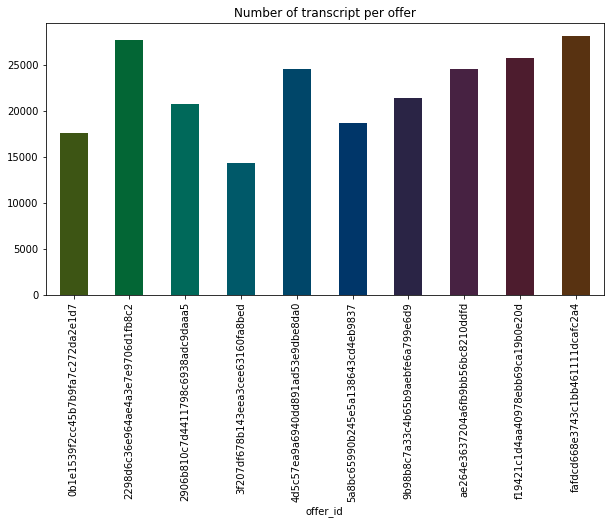

In [160]:
offers_transcript = new_transcript[new_transcript['offer_id'] != 0].groupby(['offer_id']).count()['person']
figure, ax = plt.subplots(figsize = (10, 5))
offers_transcript.plot(kind ='bar', title ='Number of transcript per offer', 
                       color = ['#3d5514', '#036635', '#00695a', '#005969', '#004669', '#003669', '#2a2445', '#472242', '#4d1c2e', '#583211'],
                       ax = ax);

In [161]:
offers = offers_transcript.to_frame().reset_index()
offers.sort_values(by = 'person')

,offer_id,person
3,3f207df678b143eea3cee63160fa8bed,14315
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,17594
5,5a8bc65990b245e5a138643cd4eb9837,18652
2,2906b810c7d4411798c6938adc9daaa5,20721
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,21422
7,ae264e3637204a6fb9bb56bc8210ddfd,24512
4,4d5c57ea9a6940dd891ad53e9dbe8da0,24527
8,f19421c1d4aa40978ebb69ca19b0e20d,25737
1,2298d6c36e964ae4a3e7e9706d1fb8c2,27728
9,fafdcd668e3743c1bb461111dcafc2a4,28188


In [162]:
offer_info = pd.merge(offers, new_portfolio, how = 'left', left_on='offer_id', right_on='id')
offer_info.sort_values(by = 'person')

,offer_id,person,difficulty,duration,id,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_type
3,3f207df678b143eea3cee63160fa8bed,14315,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1,informational
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,17594,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0,discount
5,5a8bc65990b245e5a138643cd4eb9837,18652,0,3,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,0,1,informational
2,2906b810c7d4411798c6938adc9daaa5,20721,10,7,2906b810c7d4411798c6938adc9daaa5,2,1,1,0,1,0,1,0,discount
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,21422,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0,bogo
7,ae264e3637204a6fb9bb56bc8210ddfd,24512,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0,bogo
4,4d5c57ea9a6940dd891ad53e9dbe8da0,24527,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0,bogo
8,f19421c1d4aa40978ebb69ca19b0e20d,25737,5,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,1,1,0,0,bogo
1,2298d6c36e964ae4a3e7e9706d1fb8c2,27728,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,3,1,1,1,1,0,1,0,discount
9,fafdcd668e3743c1bb461111dcafc2a4,28188,10,10,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0,1,0,discount


From the above dataframe, the offers that use the four types of channels have bigger number of transactions than the other offers. For example, offer 4, 8, 1, 9, which use the four channels, have bigger number of transactions. 

#### 3.1.2. Preparing Datasets for Modeling
After cleaning each dataset, these datasets will be prepared for modeling. Three datasets will be constructed:
 * `all_datasets`: A dataset of the merged datasets. 
 * `completed_offers`: A dataset of the offers that have responses and it will be used to answer the first and second questions. 
 * `not_completed_offers`: A dataset of the offers that have no responses and it will be used to answer the first question.

#### 3.1.2.1. Merge All Datasets

In [163]:
# Rename the id column in portfolio dataset 
new_portfolio = new_portfolio.rename(columns = {'id':'offer_id'})

# Rename the id column in profile dataset 
new_profile = new_profile.rename(columns = {'id':'person'})

# Merge clean portfolio and clean transcript datasets
all_datasets = pd.merge(new_transcript, new_profile, how = 'left', on ='person')
all_datasets = pd.merge(all_datasets, new_portfolio, how = 'left', on ='offer_id')
all_datasets

,amount,offer_id,person,time(days),event_offer completed,event_offer received,event_offer viewed,event_transaction,age,income,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_type
0,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.00,0,1,0,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
1,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.25,0,0,1,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
2,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,1,0,0,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
3,16.06,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,0,0,0,1,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
4,7.18,NaN,ffff82501cea40309d5fdd7edcca4a07,3.25,0,0,0,1,45.0,62000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9.12,NaN,ffff82501cea40309d5fdd7edcca4a07,5.00,0,0,0,1,45.0,62000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,7.00,0,1,0,0,45.0,62000.0,...,10.0,5.0,1,0,0,1,0.0,1.0,0.0,discount
7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,7.25,0,0,1,0,45.0,62000.0,...,10.0,5.0,1,0,0,1,0.0,1.0,0.0,discount
8,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,8.25,1,0,0,0,45.0,62000.0,...,10.0,5.0,1,0,0,1,0.0,1.0,0.0,discount
9,22.88,0b1e1539f2cc45b7b9fa7c272da2e1d7,ffff82501cea40309d5fdd7edcca4a07,8.25,0,0,0,1,45.0,62000.0,...,10.0,5.0,1,0,0,1,0.0,1.0,0.0,discount


In [164]:
# View null values
all_datasets.isnull().sum()

amount                      167581
offer_id                     83138
person                           0
time(days)                       0
event_offer completed            0
event_offer received             0
event_offer viewed               0
event_transaction                0
age                          33772
income                       33772
created_account_date         33772
gender_F                     33772
gender_M                     33772
gender_O                     33772
difficulty                   83138
duration                     83138
reward                       83138
email                        83138
mobile                       83138
social                       83138
web                          83138
offer_type_bogo              83138
offer_type_discount          83138
offer_type_informational     83138
offer_type                   83138
dtype: int64

I will delete the null values in the age, gender, income, created_account_date columns because these columns related to the customers demographics and here I am studing the customer responds. 
The rows with null values in the portfolio columns are transactions which do no have offer ids.

In [165]:
# Delete age null values
all_datasets = all_datasets.dropna(subset = ['age'])
all_datasets.head()

,amount,offer_id,person,time(days),event_offer completed,event_offer received,event_offer viewed,event_transaction,age,income,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_type
0,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.00,0,1,0,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
1,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.25,0,0,1,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
2,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,1,0,0,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
3,16.06,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,0,0,0,1,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
4,7.18,NaN,ffff82501cea40309d5fdd7edcca4a07,3.25,0,0,0,1,45.0,62000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
# View null values
all_datasets.isnull().sum()

amount                      148805
offer_id                     74081
person                           0
time(days)                       0
event_offer completed            0
event_offer received             0
event_offer viewed               0
event_transaction                0
age                              0
income                           0
created_account_date             0
gender_F                         0
gender_M                         0
gender_O                         0
difficulty                   74081
duration                     74081
reward                       74081
email                        74081
mobile                       74081
social                       74081
web                          74081
offer_type_bogo              74081
offer_type_discount          74081
offer_type_informational     74081
offer_type                   74081
dtype: int64

In [167]:
all_datasets.columns

Index(['amount', 'offer_id', 'person', 'time(days)', 'event_offer completed',
       'event_offer received', 'event_offer viewed', 'event_transaction',
       'age', 'income', 'created_account_date', 'gender_F', 'gender_M',
       'gender_O', 'difficulty', 'duration', 'reward', 'email', 'mobile',
       'social', 'web', 'offer_type_bogo', 'offer_type_discount',
       'offer_type_informational', 'offer_type'],
      dtype='object')

In [168]:
# Show offer type and the completed offer
all_datasets.groupby('offer_type')['event_offer completed'].value_counts()

offer_type     event_offer completed
bogo           0                        70662
               1                        15258
discount       0                        66910
               1                        17186
informational  0                        28665
Name: event_offer completed, dtype: int64

We can see that, informational offer do not need to be completed by customers. 

#### 3.1.2.2. Completed Offers Dataset

This dataset contains all necessary data about the customers who are completed offers. Firstly, Each offer type is extracted from all_datasets dataframe. Secondly, the datasets is merge based on the offer_id.

In [169]:
# Extract recieved, completed and transaction offers from all_dataset dataframe 
recieved = all_datasets[all_datasets['event_offer received'] == 1][['person', 'offer_id', 'time(days)', 'offer_type', 'offer_type_bogo', 'offer_type_discount', 'duration', 'reward']]
completed = all_datasets[all_datasets['event_offer completed'] == 1][['person', 'offer_id', 'time(days)', 'event_offer completed']]
transaction = all_datasets[all_datasets['event_transaction'] == 1][['person', 'offer_id', 'time(days)','amount']]

# Merging the three dfs
completed_offers = pd.merge(recieved, completed, how = "left", on = ["person", "offer_id"])
completed_offers = pd.merge(completed_offers, transaction, how = "left", on = ["person", "offer_id"])

# Keep only the completed offers
completed_offers = completed_offers[completed_offers['event_offer completed'] == 1]
completed_offers.head()

,person,offer_id,time(days)_x,offer_type,offer_type_bogo,offer_type_discount,duration,reward,time(days)_y,event_offer completed,time(days),amount
0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,0.0,discount,0.0,1.0,10.0,2.0,2.50,1.0,2.50,16.06
1,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,7.0,discount,0.0,1.0,10.0,5.0,8.25,1.0,8.25,22.88
2,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,16.00,15.57
3,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,17.25,17.55
4,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,24.00,14.23


In [170]:
# Renameing columns
completed_offers = completed_offers.rename(columns = {'time(days)_x':'recieving_time', 'time(days)_y':'completing_time', 
                                                  'time(days)': 'transaction_time'})

completed_offers.head()

,person,offer_id,recieving_time,offer_type,offer_type_bogo,offer_type_discount,duration,reward,completing_time,event_offer completed,transaction_time,amount
0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,0.0,discount,0.0,1.0,10.0,2.0,2.50,1.0,2.50,16.06
1,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,7.0,discount,0.0,1.0,10.0,5.0,8.25,1.0,8.25,22.88
2,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,16.00,15.57
3,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,17.25,17.55
4,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,24.00,14.23


In [171]:
completed_offers.shape[0]

78489

Some offers in the dataset are done without a transaction, so, I want to remove these offers. 
Now, I will calculate the difference between the recieving time and transaction and then compare this time with the offer duration.

In [172]:
# Removing null amount values = no transaction
completed_offers = completed_offers[completed_offers['amount'].notnull()]

# Calculate the difference between the recieving time and transaction 
completed_offers['response_duration'] = completed_offers['transaction_time'] - completed_offers['recieving_time'] 

# Keep the offers with duration less than the response time 
completed_offers = completed_offers[completed_offers['response_duration'] < completed_offers['duration']]
completed_offers

,person,offer_id,recieving_time,offer_type,offer_type_bogo,offer_type_discount,duration,reward,completing_time,event_offer completed,transaction_time,amount,response_duration
0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,0.0,discount,0.0,1.0,10.0,2.0,2.50,1.0,2.50,16.06,2.50
1,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,7.0,discount,0.0,1.0,10.0,5.0,8.25,1.0,8.25,22.88,1.25
2,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,16.00,15.57,2.00
3,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,17.25,17.55,3.25
6,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,17.25,1.0,16.00,15.57,2.00
7,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,17.25,1.0,17.25,17.55,3.25
10,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,24.00,1.0,16.00,15.57,2.00
11,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,24.00,1.0,17.25,17.55,3.25
14,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,16.00,15.57,-1.00
15,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,17.25,17.55,0.25


In [173]:
# Merge offer info with profile info
completed_offers = pd.merge(completed_offers, new_profile [['person', 'age', 'gender_F', 'gender_M','gender_O', 'income']],
                            how = "inner", on = ["person"])
completed_offers.head()

,person,offer_id,recieving_time,offer_type,offer_type_bogo,offer_type_discount,duration,reward,completing_time,event_offer completed,transaction_time,amount,response_duration,age,gender_F,gender_M,gender_O,income
0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,0.0,discount,0.0,1.0,10.0,2.0,2.50,1.0,2.50,16.06,2.50,45,1,0,0,62000.0
1,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,7.0,discount,0.0,1.0,10.0,5.0,8.25,1.0,8.25,22.88,1.25,45,1,0,0,62000.0
2,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,16.00,15.57,2.00,45,1,0,0,62000.0
3,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,16.00,1.0,17.25,17.55,3.25,45,1,0,0,62000.0
4,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,0.0,1.0,7.0,2.0,17.25,1.0,16.00,15.57,2.00,45,1,0,0,62000.0


In [174]:
# Count unique rows
completed_offers.nunique()

person                   11958
offer_id                     8
recieving_time               6
offer_type                   2
offer_type_bogo              2
offer_type_discount          2
duration                     3
reward                       4
completing_time            120
event_offer completed        1
transaction_time           120
amount                    4381
response_duration          136
age                         84
gender_F                     2
gender_M                     2
gender_O                     2
income                      91
dtype: int64

In [175]:
# Count dublicated rows
completed_offers.duplicated().sum()

1256

In [176]:
# Remove dublicated rows
completed_offers.drop_duplicates(inplace = True)

In [177]:
completed_offers.duplicated().sum()

0

In [178]:
completed_offers.shape[0]

63403

#### 3.1.2.3. Not Complete Offers Dataset

This dataset contains all necessary data about the customers who are not completed offers. 

In [179]:
# Customers who did not complete an offer recieve offers without make transactions.
not_completed_offer_persons = np.setdiff1d(recieved['person'], transaction['person'])
list(not_completed_offer_persons)

['01d7da27b8934ba1b3602a0153e4415f',
 '031387fa9cfd47e88f4e4b4b4cb71925',
 '043b6b6be98c412d901f7f376e0548d0',
 '044a7e5bbe7f4c66a898ad1dc4bc0049',
 '04837bcb97e241769a747cd71c50fe2f',
 '08b352c3e09a42e1900892a317f2b84e',
 '08e7c2a166ff44e4a009a18b5e8e4b81',
 '09533b07fec7435d97fe33fc9aca6428',
 '09d4dc01d9d74d5d87f8b537f2e248b4',
 '0a570779782948acb54f2f8e31a49c21',
 '0b2c053116874c8abe7c1c4aa9af7e24',
 '0b8684abe074418d9ec08eee090f1859',
 '0cfc8087b52b413f98f20f433ca54b23',
 '0d20a089f54045539b2ee9b292c0cdc8',
 '0daad40a375348329d90f625a13a1e3f',
 '0f4eeccda01547bdaa30113a09725a2b',
 '0ff807928b5a4975befa9d967f31120a',
 '109c657e856f4722b46a9183aaaf8c95',
 '112b5ae4463b41acac4d1a10fcefe67b',
 '11e2d9f6ef474d13bcf1db21f5c7bb62',
 '122d6efefb634edeb6a7199163a012d5',
 '1250358a301d4494807df7e9ffc18fa9',
 '12f80d3087144ef8ae3de90220cd0b2d',
 '13b7b2eccf664a329d83d2a238a9a11d',
 '13f997b9e6384b809bfe26cb6fa9f8af',
 '145de283cf9c4377a3dea3afb87774f3',
 '167b19678df54338b4ee6879b3e2591a',
 

In [180]:
# Retrive the information of customers who not completed offers
not_completed_offers = all_datasets[all_datasets['person'].isin(not_completed_offer_persons)]
not_completed_offers.head()

,amount,offer_id,person,time(days),event_offer completed,event_offer received,event_offer viewed,event_transaction,age,income,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_type
165,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,ffed75d3abc64b488982f50ed12878b5,0.00,0,1,0,0,20.0,44000.0,...,5.0,10.0,1,1,1,1,1.0,0.0,0.0,bogo
166,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,ffed75d3abc64b488982f50ed12878b5,0.75,0,0,1,0,20.0,44000.0,...,5.0,10.0,1,1,1,1,1.0,0.0,0.0,bogo
167,NaN,ae264e3637204a6fb9bb56bc8210ddfd,ffed75d3abc64b488982f50ed12878b5,14.00,0,1,0,0,20.0,44000.0,...,7.0,10.0,1,1,1,0,1.0,0.0,0.0,bogo
168,NaN,ae264e3637204a6fb9bb56bc8210ddfd,ffed75d3abc64b488982f50ed12878b5,14.50,0,0,1,0,20.0,44000.0,...,7.0,10.0,1,1,1,0,1.0,0.0,0.0,bogo
253,NaN,f19421c1d4aa40978ebb69ca19b0e20d,ffd810f301ad42d6bfe98c4ba6ee4125,0.00,0,1,0,0,65.0,52000.0,...,5.0,5.0,1,1,1,1,1.0,0.0,0.0,bogo


In [181]:
# Keep only customers who have profiles
not_completed_offers = pd.merge(not_completed_offers[['person', 'offer_id', 'offer_type_bogo', 'offer_type_discount', 'offer_type_informational','duration','reward','amount', 'event_offer completed']],
                               new_profile [['person', 'age', 'gender_F', 'gender_M', 'gender_O', 'income']], how = "inner", on =["person"])
not_completed_offers.head()

,person,offer_id,offer_type_bogo,offer_type_discount,offer_type_informational,duration,reward,amount,event_offer completed,age,gender_F,gender_M,gender_O,income
0,ffed75d3abc64b488982f50ed12878b5,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,0.0,0.0,5.0,10.0,NaN,0,20,0,1,0,44000.0
1,ffed75d3abc64b488982f50ed12878b5,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,0.0,0.0,5.0,10.0,NaN,0,20,0,1,0,44000.0
2,ffed75d3abc64b488982f50ed12878b5,ae264e3637204a6fb9bb56bc8210ddfd,1.0,0.0,0.0,7.0,10.0,NaN,0,20,0,1,0,44000.0
3,ffed75d3abc64b488982f50ed12878b5,ae264e3637204a6fb9bb56bc8210ddfd,1.0,0.0,0.0,7.0,10.0,NaN,0,20,0,1,0,44000.0
4,ffd810f301ad42d6bfe98c4ba6ee4125,f19421c1d4aa40978ebb69ca19b0e20d,1.0,0.0,0.0,5.0,5.0,NaN,0,65,0,1,0,52000.0


In [182]:
not_completed_offers.duplicated().sum()

1382

In [183]:
not_completed_offers.drop_duplicates(inplace = True)

In [184]:
not_completed_offers.duplicated().sum()

0

In [185]:
not_completed_offers.shape[0]

1235

To build the classifer and answer the first question, I have to concatenate the two datasets completed_offers and not_completed_offers and as it is clear, completed_offers dataframe has 63403 rows and not_completed_offers has 1235 rows. Thus, concatenating the two datasets results unbalanced dataset. So, I will keep only 1235 rows of completed offers. 

**Model 1 Dataset**

In [186]:
# Create model 1 dataset 
# Balanced dataset
model1_ds = completed_offers.iloc[0:not_completed_offers.shape[0], :]

# Concatenate completed and not completed offers
model1_ds_columns = ['age', 'gender_F', 'gender_M', 'gender_O', 'income', 'offer_type_bogo', 'offer_type_discount', 'event_offer completed']
model1_ds = model1_ds[model1_ds_columns]
model1_ds = model1_ds.append(not_completed_offers[model1_ds_columns])
model1_ds

,age,gender_F,gender_M,gender_O,income,offer_type_bogo,offer_type_discount,event_offer completed
0,45,1,0,0,62000.0,0.0,1.0,1.0
1,45,1,0,0,62000.0,0.0,1.0,1.0
2,45,1,0,0,62000.0,0.0,1.0,1.0
3,45,1,0,0,62000.0,0.0,1.0,1.0
4,45,1,0,0,62000.0,0.0,1.0,1.0
5,45,1,0,0,62000.0,0.0,1.0,1.0
6,45,1,0,0,62000.0,0.0,1.0,1.0
7,45,1,0,0,62000.0,0.0,1.0,1.0
8,45,1,0,0,62000.0,0.0,1.0,1.0
9,45,1,0,0,62000.0,0.0,1.0,1.0


**Model 2 Dataset**

In [234]:
# Create model 2 dataset 
model2_ds = completed_offers[['income', 'age', 'gender_F', 'gender_M', 'offer_type']]
model2_ds

,income,age,gender_F,gender_M,offer_type
0,62000.0,45,1,0,discount
1,62000.0,45,1,0,discount
2,62000.0,45,1,0,discount
3,62000.0,45,1,0,discount
4,62000.0,45,1,0,discount
5,62000.0,45,1,0,discount
6,62000.0,45,1,0,discount
7,62000.0,45,1,0,discount
8,62000.0,45,1,0,discount
9,62000.0,45,1,0,discount


### 3.2. Implementation
In this step, the following four questions are answered by different modeling techniques:
- Will the customer respond to the offer?
- Which customers will respond to a specific offer?
- Which customers view offers?
- Which customers paid more money? 
To answer the first two questions, I need to use machine learning algorithms. While to answer the other two questions, I do not need to use machine learning algorithms. 

The section firstly presented all functions required to build the models, then it showed how to build the models.   

In [188]:
# Train the classifier function
def train_classifier(classifier, X_train, y_train, X_test, y_test): 
    
    """
    Function: train a classification algorithm.
    Args:
    classifier: the classification algorithm to be trained and predicted on
    X_train (dataframe): features training set
    y_train (dataframe): labels training set
    X_test (dataframe): features testing set
    y_test (dataframe): labels testing set
    """
    
    results = {}
    
    # Fit the classifier to the training data
    start = time() # Get start time
    clf = classifier.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set
    start = time() # Get start time
    predictions_test = clf.predict(X_test)
    predictions_train = clf.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the training set
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on testing set 
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    print("{} training...".format(clf.__class__.__name__))
        
    # Return the results
    return results

In [189]:
# Tuning the model
def tune_model(classifier, X_train, y_train, X_test, y_test, parameters):
    
    """
    Function: fine-tune the classifier parameters to find the optimal parameters values. 
    Args:
    classifier: the classification algorithm 
    X_train (dataframe): features training set
    y_train (dataframe): labels training set
    X_test (dataframe): features testing set
    y_test (dataframe): labels testing set
    parameters (dictionary): parameters to be used in the grid search
    """
    results = {}
    
    #Make an f1_score scoring object 
    scorer = make_scorer(f1_score, greater_is_better=True, average='micro')

    #Perform grid search on the classifier using 'scorer' as the scoring method 
    grid_obj = GridSearchCV(classifier, parameters, scoring = scorer)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_
    best_params = grid_obj.best_params_

    # Make predictions 
    best_predictions = best_clf.predict(X_test)
    
    # Compute accuracy after tuning
    acc = accuracy_score(y_test, best_predictions)
    
    print("{} Tuning...".format(classifier.__class__.__name__))
    
    # Return the results
    return acc, best_params

In [190]:
# Ranks the importance of each feature 
def feature_plot(importances, X_train, y_train, top_feat = 5):
    """
    Function: show the top importance features in a graph  
    Args:
    importances (list): the importance of the feature 
    X_train (dataframe): features training set
    y_train (dataframe): labels training set
    top_feat (int): the number of features to be showed in the plot 
    """  
    # Display the most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:top_feat]]
    values = importances[indices][:top_feat]
    
    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("The Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(top_feat), values, width = 0.6, align="center", color = '#4d1f1c', label = "Feature Weight")
    plt.xticks(np.arange(top_feat), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    plt.show()  


### Question 1: Will the Customer Respond to the Offer?

Answering this question requires building a machine learning algorithm. 

#### Model 1: Response to Offers Prediction Model 

The approaches to build the model is the following:
* Selecting classification algorithms.
* Splitting the data.
* Creating and training model.
* Evaluating the initial model.
* Model tuning.
* Extracting feature importance.

**Selecting Classification Algorithms**

In order to build the model, I will use different classification algorithms to check which on is the best. Here the three selected algorithms and the reason of selecting. 

   * Random Forest Classifier

   It is the most flexible and easy to use algorithm and it gets prediction from each different decision trees and it make random selection of feature-subset to provide a good indicator of the feature importance. 
   

   * Bagging Classifier

   It combines the predictions from multiple decision trees algorithms together to make more accurate predictions than any individual model by averaging selection of outcome from the trees. 
   

   * Gaussian Naive Bayes

   It is a simple classification algorithm. 

**Splitting the Data**

I will split the data into training and test sets, 80% for training and 20% for testing.


In [191]:
label = model1_ds['event_offer completed']
features = model1_ds.drop('event_offer completed', axis = 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1976 samples.
Testing set has 494 samples.


**Creating and Training Model**

In [192]:
#Initialize the three models
clf_1 = RandomForestClassifier(random_state = 1)
clf_2 = BaggingClassifier(random_state = 1)
clf_3 = GaussianNB()

In [193]:
# Fit the classifiers
results = {}
for clf in [clf_1, clf_2, clf_3]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_classifier(clf, X_train, y_train, X_test, y_test)

RandomForestClassifier training...
BaggingClassifier training...
GaussianNB training...


**Evaluating the Initial Model**

I will evauate the created model using the accuracy. I will also calculate the training time and prediction time.  

In [194]:
# Print classifiers results
for clf in [clf_1, clf_2, clf_3]:
    clf_name = clf.__class__.__name__
    print(clf_name)
    print()
    print("Accuracy score on training data: {:.4f}".format(results[clf_name]['acc_train']))
    print("Training time: {:.4f}sec".format(results[clf_name]['train_time']))
    print("Accuracy score on testing data: {:.4f}".format(results[clf_name]['acc_test']))
    print("Predication time: {:.4f} sec".format(results[clf_name]['pred_time']))
    print('------------')
    print()


RandomForestClassifier

Accuracy score on training data: 0.9833
Training time: 0.0363sec
Accuracy score on testing data: 0.8947
Predication time: 0.0058 sec
------------

BaggingClassifier

Accuracy score on training data: 0.9863
Training time: 0.0382sec
Accuracy score on testing data: 0.9089
Predication time: 0.0062 sec
------------

GaussianNB

Accuracy score on training data: 0.5997
Training time: 0.0011sec
Accuracy score on testing data: 0.6012
Predication time: 0.0008 sec
------------



From the algorithms results, we can see that Bagging classifier achieved the best accuracy score and Random Forest classifier achieved the second best accuracy score. As for GaussianNB, it was the faster classifier, but it did not give a good score, this is could be because the data is not big enough to train the model. 
In the next part, I will tune the parameters of Bagging classifier.

**Model Tuning**

I will fine tune the Bagging Classifier model by using grid search `GridSearchCV`.

In [195]:
# Initialize parameters for the Bagging classifier
parameters =  {'n_estimators': [5, 10, 15, 20, 30], 'bootstrap_features': [True, False], 'max_samples' : [0.8, 1.0]}

# Apply grid search
acc, best_params = tune_model(clf_2, X_train, y_train, X_test, y_test, parameters)

BaggingClassifier Tuning...


In [196]:
# Print classifiers results

print("Accuracy score on testing data: {:.4f}".format(acc))
print("Best Parameters: {}".format(best_params))


Accuracy score on testing data: 0.9211
Best Parameters: {'bootstrap_features': True, 'max_samples': 1.0, 'n_estimators': 30}


Tuning the model increases the accuracy. 

In [197]:
# Using the best params in the model
bag_clf = BaggingClassifier(random_state = 1, bootstrap_features = False, max_samples = 1.0, n_estimators = 30)
bag_clf = bag_clf.fit(X_train, y_train)
bag_pred = bag_clf.predict(X_test)
print(classification_report(y_test, bag_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.94      0.92       253
        1.0       0.93      0.89      0.91       241

avg / total       0.92      0.91      0.91       494



**Extracting Feature Importance**

I will determine features that provide the most predictive power by using `feature_importances_ `

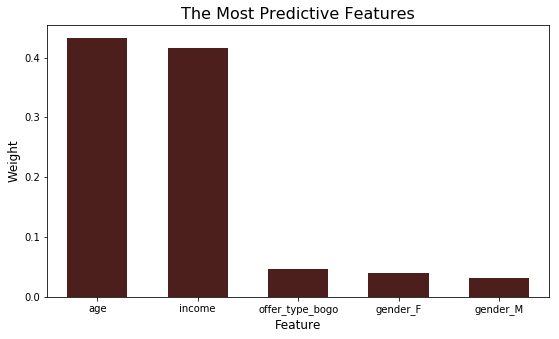

In [198]:
bag_importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
feature_plot(bag_importances, X_train, y_train)

**Observations:**

As it is clear, age and income are two of the five top important features. For more investigation, I will check the distribution ages and incomes.

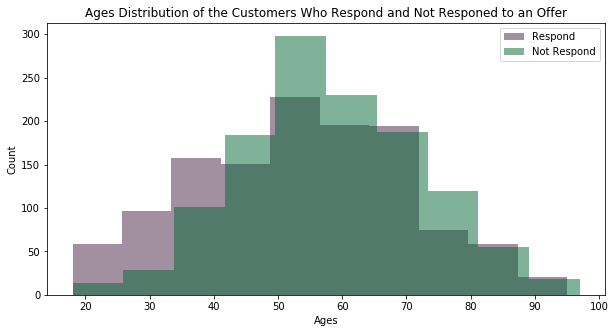

In [199]:
# Ages distribution
complete_age_data = model1_ds[model1_ds['event_offer completed'] == 1]['age']
not_complete_age_data = model1_ds[model1_ds['event_offer completed'] == 0]['age']

# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(complete_age_data, color = '#472242', alpha = 0.5, label = 'Respond')
ax.hist(not_complete_age_data, color ='#036635', alpha = 0.5, label = 'Not Respond')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Ages Distribution of the Customers Who Respond and Not Responed to an Offer')
plt.legend()
plt.show()

In general, the customers who are between 18 and 45 years old are likely to complete offers, while the customers who are greater than 45 are less likely to complete an offer.

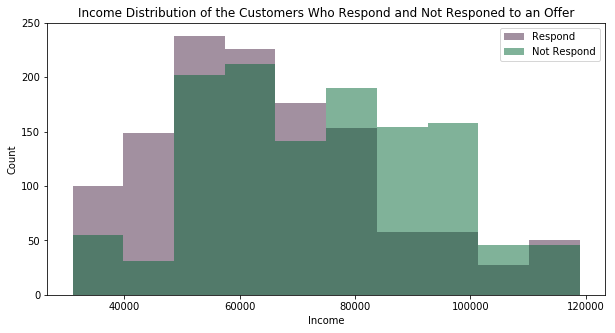

In [200]:
# Incomes distribution
complete_income_data = model1_ds[model1_ds['event_offer completed'] == 1]['income']
not_complete_income_data = model1_ds[model1_ds['event_offer completed'] == 0]['income']

# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(complete_income_data, color = '#472242', alpha = 0.5, label = 'Respond')
ax.hist(not_complete_income_data, color = '#036635', alpha = 0.5, label = 'Not Respond')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution of the Customers Who Respond and Not Responed to an Offer')
plt.legend()
plt.show()

The customers who have incomes between 350000 and 50000 are more likely to complete an offer while the customes who have  incomes between 50000 and 70000 are less likely complete an offer and the customers who have greater incomes are usually not respond to offers. This is could be because the customers who have greate incomes are rich and they do not care about offers. 

**Final Results**

From the previous analysis, I can say that the offers should be sent to the customers that are probably respond. These customers are between 18 and 45 years old and have incomes between 35000 and 70000.

### Question 2: Which Offer Should be Sent to the Customer?

Answering this question requires building a machine learning model. 

#### Model 2: Response to an Offer by a Customer Model 

The approche to build the model is the following:
* Selecting classification algorithms.
* Splitting the data.
* Creating and training model.
* Evaluating the initial model.
* Model tuning.
* Extracting feature importance.

**Selecting Classification Algorithms**

In order to build the model, I will use different classification algorithms to check which on is the best. Here the three selected algorithms and the reason of selecting. 

   * Random Forest Classifier

   It is the most flexible and easy to use algorithm and it gets prediction from each different decision trees and it make random selection of feature-subset to provide a good indicator of the feature importance. 
   

   * Bagging Classifier

   It combines the predictions from multiple decision trees algorithms together to make more accurate predictions than any individual model by averaging selection of outcome from the trees. 
   

**Splitting the Data**

I will split the data into training and test sets, 80% for training and 20% for testing.


In [201]:
label2 = model2_ds['offer_type']
features2 = model2_ds.drop('offer_type', axis = 1)

# Split the 'features' and 'income' data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(features2, label2, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X2_train.shape[0]))
print("Testing set has {} samples.".format(X2_test.shape[0]))

Training set has 50722 samples.
Testing set has 12681 samples.


**Creating and Training Model**

In [202]:
#Initialize the three models
clf_4 = BaggingClassifier(random_state = 1)
clf_5 = RandomForestClassifier(random_state = 1)

In [203]:
# Fit the classifiers
results = {}
for clf in [clf_4, clf_5]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_classifier(clf, X2_train, y2_train, X2_test, y2_test)

BaggingClassifier training...
RandomForestClassifier training...


**Evaluating the Initial Model**

I will evauate the created model using the accuracy. I will also calculate the training time and prediction time.  

In [204]:
# Print classifiers results
for clf in [clf_4, clf_5]:
    clf_name = clf.__class__.__name__
    print(clf_name)
    print()
    print("Accuracy score on training data: {:.4f}".format(results[clf_name]['acc_train']))
    print("Training time: {:.4f}sec".format(results[clf_name]['train_time']))
    print("Accuracy score on testing data: {:.4f}".format(results[clf_name]['acc_test']))
    print("Predication time: {:.4f} sec".format(results[clf_name]['pred_time']))
    print('------------')
    print()


BaggingClassifier

Accuracy score on training data: 0.7814
Training time: 0.8680sec
Accuracy score on testing data: 0.7230
Predication time: 0.1652 sec
------------

RandomForestClassifier

Accuracy score on training data: 0.7813
Training time: 0.6341sec
Accuracy score on testing data: 0.7226
Predication time: 0.1575 sec
------------



As you can see, the two classifiers give similar results. Thus, I will try to fine tune the two models.

**Model Tuning**

I will fine tune the Bagging classifier and Random Forest classifier model by using grid search `GridSearchCV`.

In [205]:
# Initialize parameters
parameters = {'BaggingClassifier': {'n_estimators': [5, 10, 20], 'bootstrap_features': [True, False]}, 
'RandomForestClassifier': {'n_estimators': [5, 10, 20], 'criterion': ['gini', 'entropy'],
                                         'min_samples_leaf': [1, 2], 'min_samples_split': [2, 3, 4]}}

acc = {}
best_params = {}

# Apply grid search
for clf in [clf_4, clf_5]:
    clf_name = clf.__class__.__name__
    acc[clf_name], best_params[clf_name] = tune_model(clf, X2_train, y2_train, X2_test, y2_test, parameters[clf_name])

BaggingClassifier Tuning...
RandomForestClassifier Tuning...


**Extracting Feature Importance**

I will determine features that provide the most predictive power by using `feature_importances_ `

In [206]:
# Print classifiers results
for clf in [clf_4, clf_5]:
    clf_name = clf.__class__.__name__
    print(clf_name)
    print()
    print("Accuracy score on testing data: {:.4f}".format(acc[clf_name]))
    print("Best Parameters: {}".format(best_params[clf_name] ))
    print('------------')
    print()

BaggingClassifier

Accuracy score on testing data: 0.7230
Best Parameters: {'bootstrap_features': False, 'n_estimators': 10}
------------

RandomForestClassifier

Accuracy score on testing data: 0.7226
Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
------------



In [207]:
# Using the best params in the model
bagg_clf = BaggingClassifier(random_state = 1, bootstrap_features = False,  n_estimators = 10)
bagg_clf = bagg_clf.fit(X2_train, y2_train)
bagg_pred = bagg_clf.predict(X2_test)
print(classification_report(y2_test, bagg_pred))

             precision    recall  f1-score   support

       bogo       0.70      0.67      0.69      5751
   discount       0.74      0.77      0.75      6930

avg / total       0.72      0.72      0.72     12681



In [208]:
# Using the best params in the model
rfc_clf = RandomForestClassifier (random_state = 1, criterion = 'gini', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 10)
rfc_clf = rfc_clf.fit(X2_train, y2_train)
rfc_pred = rfc_clf.predict(X2_test)
print(classification_report(y2_test, rfc_pred))

             precision    recall  f1-score   support

       bogo       0.70      0.67      0.69      5751
   discount       0.74      0.77      0.75      6930

avg / total       0.72      0.72      0.72     12681



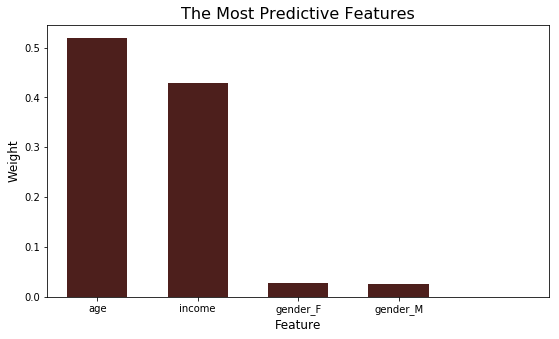

In [209]:
bagg_importances = np.mean([tree.feature_importances_ for tree in bagg_clf.estimators_], axis=0)
feature_plot(bagg_importances, X2_train, y2_train, top_feat = 4)

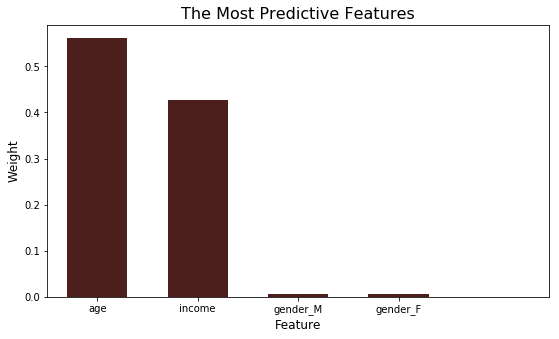

In [210]:
rfc_importances = rfc_clf.feature_importances_ 
feature_plot(rfc_importances, X2_train, y2_train, top_feat = 4)

**Observations:**

The weight of age and income features are the most importent features. So, I will investigate them. 

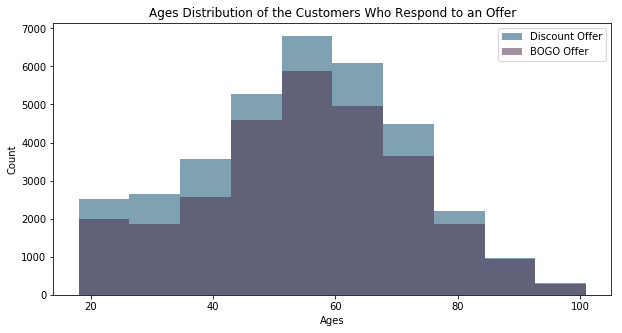

In [211]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(model2_ds[model2_ds['offer_type'] =='discount']['age'], color = '#004669', alpha = 0.5, label = 'Discount Offer')
ax.hist(model2_ds[model2_ds['offer_type'] =='bogo']['age'], color = '#472242', alpha = 0.5, label = 'BOGO Offer')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Ages Distribution of the Customers Who Respond to an Offer')
plt.legend()
plt.show()

As you can see, there is no relation between the age and the offer type. In general, the discount offer type has the most number of responses. 

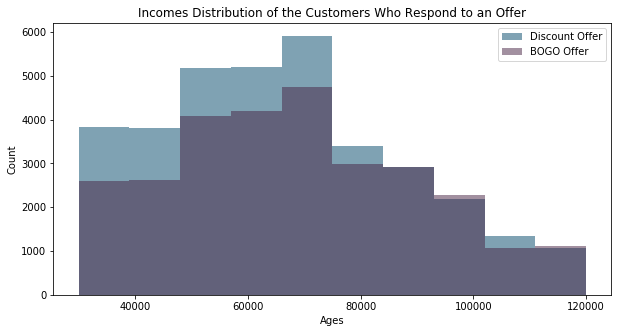

In [212]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(model2_ds[model2_ds['offer_type'] =='discount']['income'], color = '#004669', alpha = 0.5, label = 'Discount Offer')
ax.hist(model2_ds[model2_ds['offer_type'] =='bogo']['income'], color = '#472242', alpha = 0.5, label = 'BOGO Offer')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Incomes Distribution of the Customers Who Respond to an Offer')
plt.legend()
plt.show()

As you can see, the customers that have incomes 35000 - 85000 response to discount offers more than BOGO offers. 

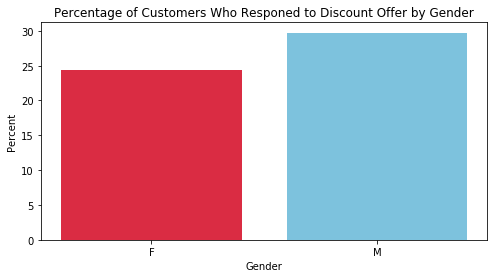

In [213]:
F = model2_ds[model2_ds['offer_type'] =='discount']['gender_F'].sum() / model2_ds.shape[0] * 100
M = model2_ds[model2_ds['offer_type'] =='discount']['gender_M'].sum() / model2_ds.shape[0] * 100

# Create a plot
figure, ax = plt.subplots(figsize = (8, 4))
ax.bar(x = ['F', 'M'], height =[F, M], color = ['#da2c43', '#7dc2dd'])
plt.xlabel('Gender')
plt.ylabel('Percent')
plt.title('Percentage of Customers Who Responed to Discount Offer by Gender')
plt.show()

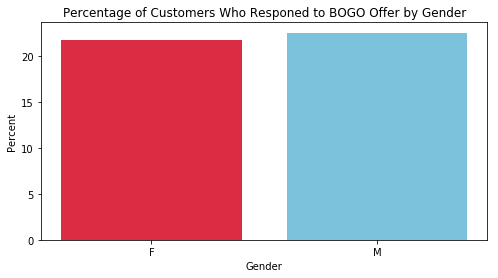

In [214]:
F = model2_ds[model2_ds['offer_type'] =='bogo']['gender_F'].sum() / model2_ds.shape[0] * 100
M = model2_ds[model2_ds['offer_type'] =='bogo']['gender_M'].sum() / model2_ds.shape[0] * 100

# Create a plot
figure, ax = plt.subplots(figsize = (8, 4))
ax.bar(x = ['F', 'M'], height =[F, M], color = ['#da2c43', '#7dc2dd'])
plt.xlabel('Gender')
plt.ylabel('Percent')
plt.title('Percentage of Customers Who Responed to BOGO Offer by Gender')
plt.show()

As we can see, there is no relation between the gender and the type of the offer.

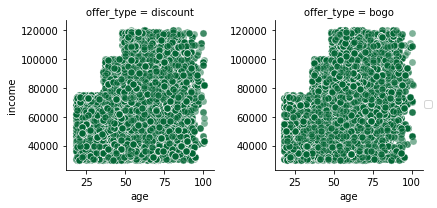

In [215]:

plt.figure(figsize=(100, 70))
kws = dict(s=50, linewidth=.5, edgecolor="w")
ax = sns.FacetGrid(data = model2_ds, col = 'offer_type');
ax.map(plt.scatter, 'age', 'income', alpha = 0.5, color = '#036635',**kws);
ax.add_legend();

**Final Results**

Since the classifier did not gave good accuracy, it was expected that there is no a clear relations between features. The only point I found that is the customers with incomes 35000 - 85000 response to discount offer more than BOGO. 
The classifier could give better results with a bigger dataset. 


### Question 3: Which Customers View the Offers?

I want to investigate the demographic information about the customers who view the offers and compare them with the customers who do not view offers. 

In [216]:
all_datasets.head()

,amount,offer_id,person,time(days),event_offer completed,event_offer received,event_offer viewed,event_transaction,age,income,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_type
0,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.00,0,1,0,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
1,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,0.25,0,0,1,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
2,NaN,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,1,0,0,0,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
3,16.06,fafdcd668e3743c1bb461111dcafc2a4,ffff82501cea40309d5fdd7edcca4a07,2.50,0,0,0,1,45.0,62000.0,...,10.0,2.0,1,1,1,1,0.0,1.0,0.0,discount
4,7.18,NaN,ffff82501cea40309d5fdd7edcca4a07,3.25,0,0,0,1,45.0,62000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
# Not viewed offers
not_viewed_offers = all_datasets[(all_datasets['event_offer viewed'] != 1) & 
                                 (all_datasets['event_offer completed'] != 1) & (all_datasets['event_transaction'] != 1 )]
# Percent of not viewed offers
not_viewed_offers_counter = not_viewed_offers.shape[0] 
not_viewed_percentage = not_viewed_offers_counter / all_datasets.shape[0] * 100

# Viewed offers
all_viewed_offers = all_datasets[all_datasets['event_offer viewed'] == 1]
viewed_offers_counter = all_viewed_offers.shape[0]

# Completed offers
all_completed_offers = all_datasets[all_datasets['event_offer completed'] == 1]
completed_offers_counter = all_completed_offers.shape[0]

# Percent of completed offers
completed_percentage = completed_offers_counter / viewed_offers_counter * 100


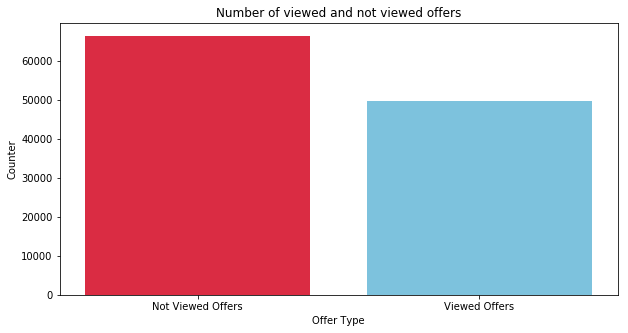

In [218]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = ['Not Viewed Offers', 'Viewed Offers'], height =[not_viewed_offers_counter, viewed_offers_counter],
       color = ['#da2c43', '#7dc2dd'])
plt.xlabel('Offer Type')
plt.ylabel('Counter')
plt.title('Number of viewed and not viewed offers')
plt.show()

In [219]:
print ('The number of viewed offers are {}, and the number of not viewed offers are {}.'
       .format(viewed_offers_counter, not_viewed_offers_counter))
print('{}% of the offers are  not viewed.'.format(round(not_viewed_percentage, 2)))

The number of viewed offers are 49860, and the number of not viewed offers are 66501.
24.38% of the offers are  not viewed.


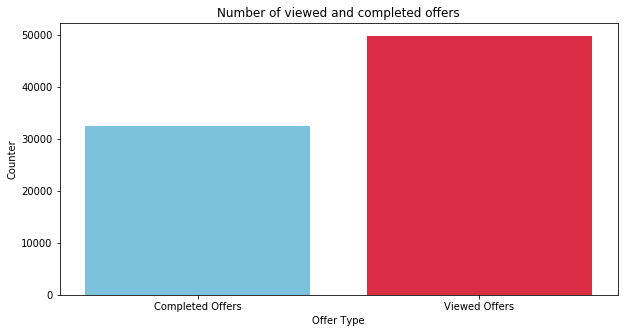

In [220]:
# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = ['Viewed Offers', 'Completed Offers'], height =[viewed_offers_counter, completed_offers_counter],
       color = ['#da2c43', '#7dc2dd'])
plt.xlabel('Offer Type')
plt.ylabel('Counter')
plt.title('Number of viewed and completed offers')
plt.show()

In [221]:
print ('The number of viewed offers are {}, and the number of completed offers are {}.'
       .format(viewed_offers_counter, completed_offers_counter))
print('{}% of the viewed offers are completed.'.format(round(completed_percentage, 2)))

The number of viewed offers are 49860, and the number of completed offers are 32444.
65.07% of the viewed offers are completed.


As you can see, the viewed offers are less than the not viewed offers, and 65% of the viewed offers are completed. 

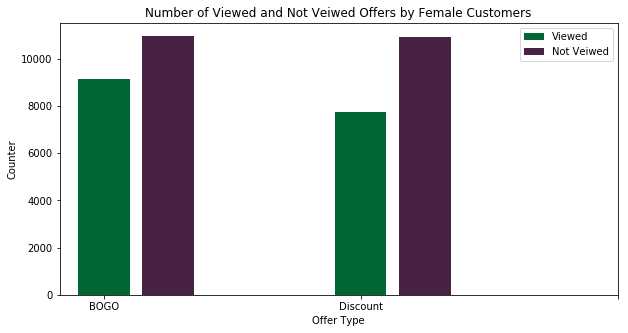

In [222]:

bogo_not_viw_f = not_viewed_offers[not_viewed_offers['offer_type'] =='bogo']['gender_F'].sum()
discount_not_viw_f = not_viewed_offers[not_viewed_offers['offer_type'] =='discount']['gender_F'].sum()

bogo_viw_f = all_viewed_offers[all_viewed_offers['offer_type'] =='bogo']['gender_F'].sum()
discount_viw_f = all_viewed_offers[all_viewed_offers['offer_type'] =='discount']['gender_F'].sum()

# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.bar(np.arange(2), width = 0.2, height = [bogo_viw_f, discount_viw_f], label ='Viewed', color = '#036635')
ax.bar(np.arange(2) + 0.25, width = 0.2, height =[bogo_not_viw_f, discount_not_viw_f], label ='Not Veiwed', color = '#472242')
plt.xlabel('Offer Type')
plt.ylabel('Counter')
plt.title('Number of Viewed and Not Veiwed Offers by Female Customers')
plt.xticks(np.arange(3), ['BOGO', 'Discount'])
plt.legend()
plt.show()

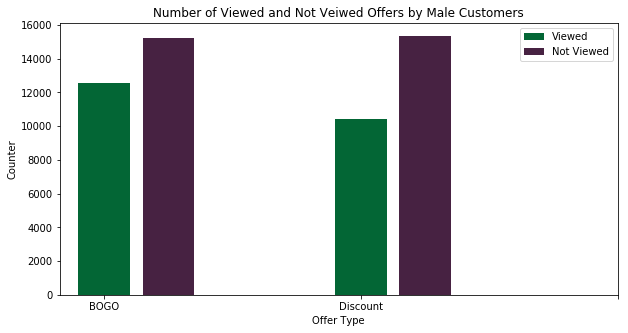

In [223]:
bogo_not_viw_m = not_viewed_offers[not_viewed_offers['offer_type'] =='bogo']['gender_M'].sum() 
discount_not_viw_m = not_viewed_offers[not_viewed_offers['offer_type'] =='discount']['gender_M'].sum()

bogo_viw_m = all_viewed_offers[all_viewed_offers['offer_type'] =='bogo']['gender_M'].sum()
discount_viw_m = all_viewed_offers[all_viewed_offers['offer_type'] =='discount']['gender_M'].sum()

# Create a plot
figure, ax = plt.subplots(figsize = (10, 5))
ax.bar(np.arange(2), width = 0.2, height = [bogo_viw_m, discount_viw_m], label ='Viewed', color = '#036635')
ax.bar(np.arange(2) + 0.25, width = 0.2, height =[bogo_not_viw_m, discount_not_viw_m], label ='Not Viewed', color = '#472242')
plt.xlabel('Offer Type')
plt.ylabel('Counter')
plt.title('Number of Viewed and Not Veiwed Offers by Male Customers')
plt.xticks(np.arange(3), ['BOGO', 'Discount'])
plt.legend()
plt.show()

In [224]:
# Calculting the percentage of viewed and not viewed offers by genders
viw_bogo_f_per = bogo_viw_f / bogo_not_viw_f  * 100
viw_discount_f_per = discount_viw_f / discount_not_viw_f * 100
viw_bogo_m_per = bogo_viw_m / bogo_not_viw_m  * 100
viw_discount_m_per = discount_viw_m / discount_not_viw_m  * 100
print(round(viw_bogo_f_per, 2))
print(round(viw_discount_f_per, 2))
print(round(viw_bogo_m_per, 2))
print(round(viw_discount_m_per, 2))

83.31
70.67
82.73
67.94


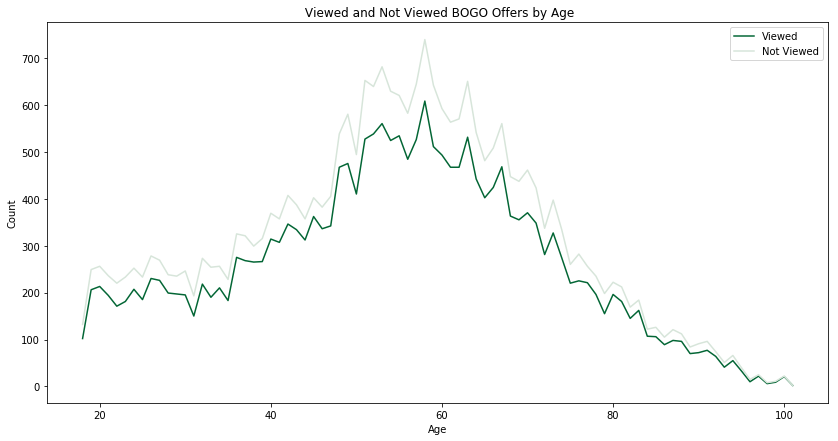

In [225]:
bogo_not_viw_age = not_viewed_offers[not_viewed_offers['offer_type'] =='bogo'].groupby(['age']).count()['offer_id'].reset_index()
bogo_viw_age = all_viewed_offers[all_viewed_offers['offer_type'] =='bogo'].groupby(['age']).count()['offer_id'].reset_index()

# Create a plot
figure, ax = plt.subplots(figsize = (14, 7))
ax.plot(bogo_viw_age['age'], bogo_viw_age['offer_id'], label ='Viewed', color = '#036635')
ax.plot(bogo_not_viw_age['age'], bogo_not_viw_age['offer_id'], label ='Not Viewed', color = '#d7e5da')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title(' Viewed and Not Viewed BOGO Offers by Age')
plt.legend()
plt.show()


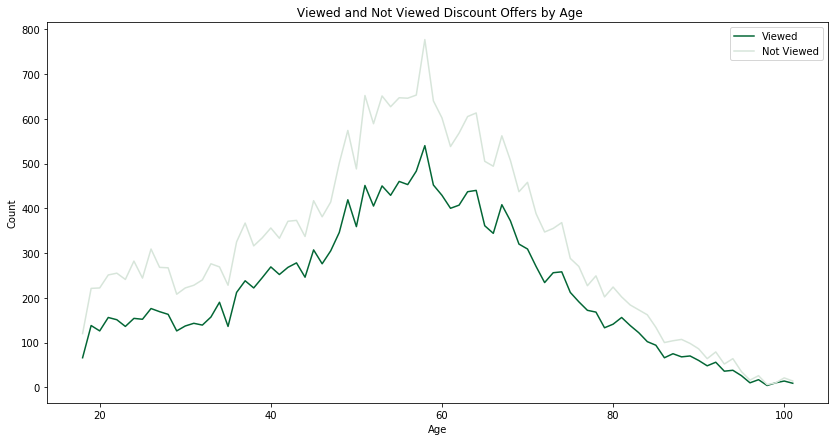

In [226]:
discount_not_viw_age = not_viewed_offers[not_viewed_offers['offer_type'] =='discount'].groupby(['age']).count()['offer_id'].reset_index()
discount_viw_age = all_viewed_offers[all_viewed_offers['offer_type'] =='discount'].groupby(['age']).count()['offer_id'].reset_index()

# Create a plot
figure, ax = plt.subplots(figsize = (14, 7))
ax.plot(discount_viw_age['age'], discount_viw_age['offer_id'], label ='Viewed', color = '#036635')
ax.plot(discount_not_viw_age['age'], discount_not_viw_age['offer_id'], label ='Not Viewed', color = '#d7e5da')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title(' Viewed and Not Viewed Discount Offers by Age')
plt.legend()
plt.show()


**Final Results**

From the above analysis, 65.07% of the offers are not viewed and only 24.38% of the viewed offers are completed. In general, the customers view more BOGO offers than discount offers. 

Exploring the demographic characteristic of the customers showes that the female customers are more likely to view the offers. The next table shows the percentage of viewing each offer by gender: 

|   Offer Type    |       Male        |      Female     |
| :-------------: | :---------------: | :-------------: | 
|     BOGO        |       82.73%      |      83.31%     |
|    Discount     |       67.94%      |      70.67%     |


As for the customer age, I did not find a relation between age and viewing offers. 


### Question 4: Which gender paid more money? 

I want to explore which gender paid more. Therefore, I will find the total amount of money that paid for offers by each customer.

In [227]:
f_amount = round(all_datasets[all_datasets['gender_F'] == 1]['amount'].sum(), 2)

In [228]:
m_amount = round(all_datasets[all_datasets['gender_M'] == 1]['amount'].sum(), 2)

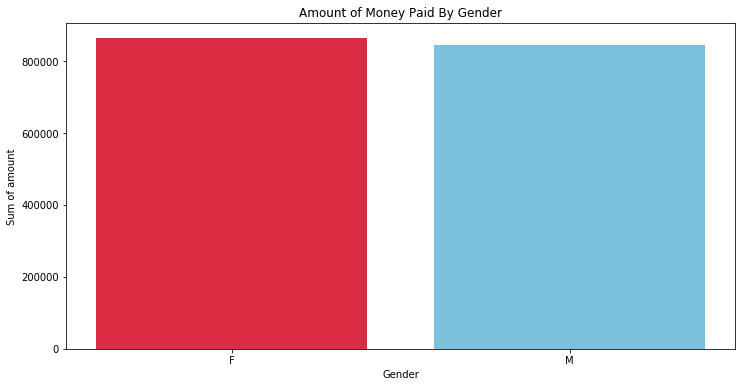

In [229]:
# Create a plot
figure, ax = plt.subplots(figsize =  (12, 6))
ax.bar(x = ['F', 'M'], height = [f_amount, m_amount], color = ['#da2c43', '#7dc2dd'])
plt.xlabel('Gender')
plt.ylabel('Sum of amount')
plt.title('Amount of Money Paid By Gender')
plt.show()

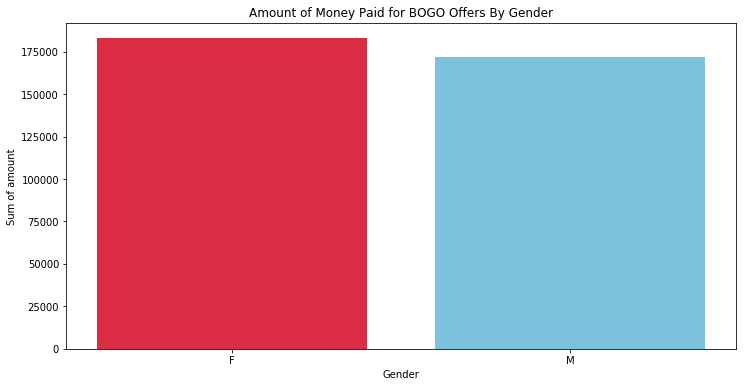

In [230]:
f_bogo_amount = round(all_datasets[(all_datasets['gender_F'] == 1) & (all_datasets['offer_type_bogo'] == 1)]['amount']
                      .sum(), 2)
m_bogo_amount = round(all_datasets[(all_datasets['gender_M'] == 1) & (all_datasets['offer_type_bogo'] == 1)]['amount']
                      .sum(), 2)

# Create a plot
figure, ax = plt.subplots(figsize = (12, 6))
ax.bar(x = ['F', 'M'], height = [f_bogo_amount, m_bogo_amount], color = ['#da2c43', '#7dc2dd'])
plt.xlabel('Gender')
plt.ylabel('Sum of amount')
plt.title('Amount of Money Paid for BOGO Offers By Gender')
plt.show()

In [231]:
print(f_bogo_amount+m_bogo_amount)

354969.24


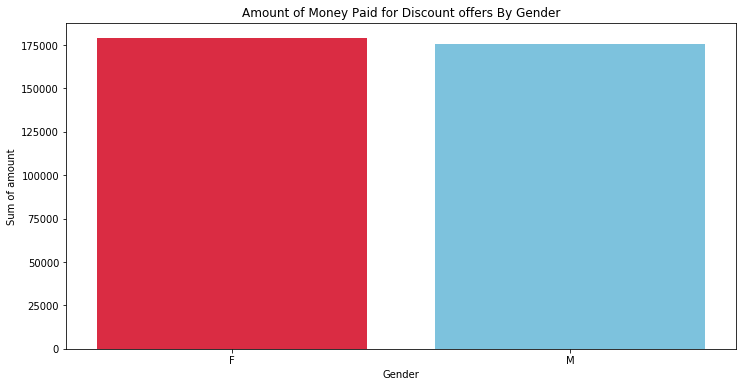

In [232]:
f_discount_amount = round(all_datasets[(all_datasets['gender_F'] == 1) & (all_datasets['offer_type_discount'] == 1)]['amount']
                      .sum(), 2)
m_discount_amount = round(all_datasets[(all_datasets['gender_M'] == 1) & (all_datasets['offer_type_discount'] == 1)]['amount']
                      .sum(), 2)

# Create a plot
figure, ax = plt.subplots(figsize =  (12, 6))
ax.bar(x = ['F', 'M'], height = [f_discount_amount, m_discount_amount], color = ['#da2c43', '#7dc2dd'])
plt.xlabel('Gender')
plt.ylabel('Sum of amount')
plt.title('Amount of Money Paid for Discount offers By Gender')
plt.show()

In [233]:
print(f_discount_amount+m_discount_amount)

354449.69


**Final Results**

As you can see, females paid more than males. The total amount of money paid by females is \\$863695.0 and by males is \\$844890.86. In addition, BOGO offer made a highest amount of money than discount offer.

## 4. Conclusion

### 4.1. Reflection

The purpose of this project is to explore how the customers of Starbucks interact with the offers in order to keep its business running and satisfy its customers. From analyzing Starbucks customers data, I found several important findings. The finding can be summarized as follows:

1.	The offers that use the four types of channels have bigger number of transactions than the other offers. 
2.	The customers who are between 18 and 45 years old are more likely to respond to offers than the older customers. 
3.	The customers who have incomes between 35000 and 70000 are more likely to respond to offers than the richer customers.
4.	The customers with incomes 35000 - 85000 response to discount offer more than BOGO.
5.	65.07% of the offers are not viewed and only 24.38% of the viewed offers are completed. 
6.	The customers view more BOGO offers than discount offers. 
7.	Females are more likely to view the offers than males. 
8.	The total amount of money paid by females is \\$863695 and by males is \\$844890.86.
9.	 BOGO offer made a highest amount of money than discount offer.


### 4.2. Improvement

For improvements, I intend to use a clustering algorithm in order to group the customers based on there behaviors. In addition, I think using a bigger dataset can help me to enhance the result of the second model and explore if there is a relation between the type of the offer and the customer demographic. 

**References**

- https://www.creditdonkey.com/coffee-drinking-statistics.html

- https://www.starbucks.com/business/international-stores

- https://apttus.com/blog/starbucks-customer-success/

- https://zinrelo.com/loyalty-rewards-case-study-new-starbucks-rewards-program.html
 
- https://stackoverflow.com/questions/27506367/python-pandas-integer-yyyymmdd-to-datetime

- https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f

- https://www.datacamp.com/community/tutorials/random-forests-classifier-python

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

- https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

- https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

- https://stats.stackexchange.com/questions/299842/why-grid-search-is-not-performed-for-naive-bayes-classifier

